# Direct marketing campaigns data of a Portuguese banking institution

# Package

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [194]:
CS = pd.read_csv("Portuguese Banking.csv")

In [195]:
CS.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no


In [196]:
print("The sahpe of the data size", CS.shape)

The sahpe of the data size (41188, 21)


# Clean the Dataset

## Detect the missing value

In [197]:
CS.isnull().sum()

age               3744
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx    5148
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

The "Age" and "cons.price.idx" have missing values, we need to see both columns distribution and decide which is method is the best to handle the missing values

#### Age

In [198]:
print("To check what percentage of the missing value in age column:", 3744/41188)

To check what percentage of the missing value in age column: 0.09090026221229484


The age column of missing values is smaller than 60%, so we cannot drop the missing values in the age column

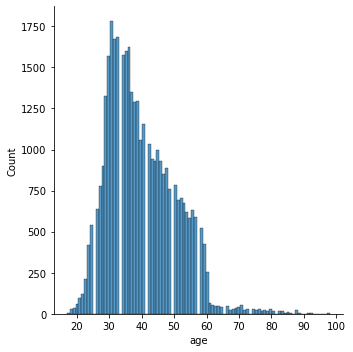

In [199]:
sns.displot(CS, x="age")

Based on our distribution plot, it seems like the "age" is right-skewed, so we only can use the median to impute the missing values.

### Impute the missing value of the Age based on median

In [200]:
Med_age = CS['age'].median()

print(Med_age)

## The average of age is 38

38.0


In [201]:
CS = CS.fillna({'age': Med_age})

In [202]:
CS

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,NaN,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Cons.price.idx

In [203]:
print("To check what percentage of the missing value in Cons.price.idx column:", 5148/41188)

To check what percentage of the missing value in Cons.price.idx column: 0.12498786054190542


The Cons.price.idx column of missing values is smaller than 60%, so we cannot drop the missing values in the Cons.price.idx column

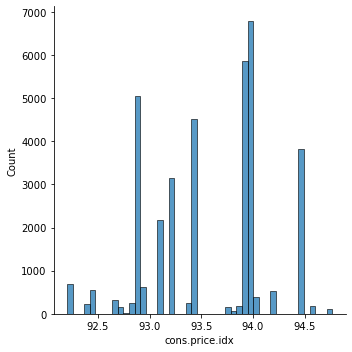

In [204]:
sns.displot(CS, x="cons.price.idx")

The Cons.price.idx is normal distribution, so we can use the mean to impute the missing values

In [205]:
Min_cons = CS['cons.price.idx'].mean()

print(Min_cons)

## The average of cons.priceidx is 93.57

93.57557541623306


In [206]:
CS = CS.fillna({'cons.price.idx': Min_cons})

CS.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no


In [207]:
CS.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Replace 'unknown' in job, marital, education, default, housing, loan with 'other'

In [208]:
CS[['job', 'marital', 'education', 'default', 'housing', 'loan']] = CS[['job', 'marital', 'education', 'default', 'housing', 'loan']].replace(['unknown'],'other')

CS.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,other,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no


In [209]:
CS

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,other,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767000,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767000,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,93.575575,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767000,-50.8,1.028,4963.6,yes


## Creating the Transforming data

### Our target value is binary value, which is "yes" & "no". So I changed from "Yes" to "1", then "No" to "0". In order to do data visualization and build the Machine Learning Model

In [210]:
## Change the column "y" to "target"

CS.rename(index=str, columns={'y': 'target'}, inplace = True)

def convert(CS, new_column, old_column):
    CS[new_column] = CS[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return CS[new_column].value_counts()

convert(CS, "target_binary", "target")

0    36548
1     4640
Name: target_binary, dtype: int64

### We found that there are 31974 in "No" (If the bank term deposit will not subscribed by the client),  and there are 4066 "Yes" (If the bank term deposit will subscribed by the client)

In [211]:
CS['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

### Change the unit of "duration" from seconds to minutes and round up to 2 decimals

In [212]:
##  Change the unit of 'duration' from seconds to minutes

CS['duration'] = CS['duration'].apply(lambda n:n/60).round(2)

## Exploratory Data Analysis

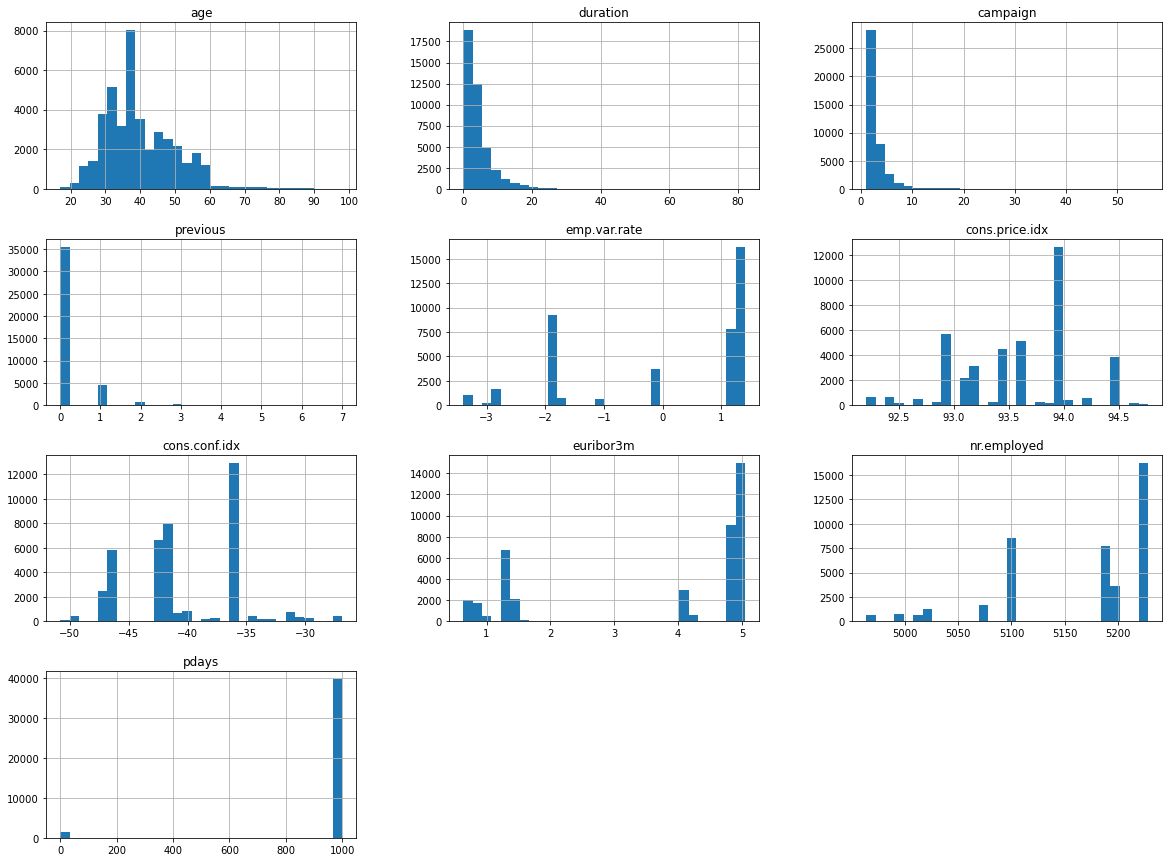

In [213]:
%matplotlib inline
CS[['age','duration','campaign','previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
   'euribor3m', 'nr.employed', 'pdays']].hist(bins=30, figsize=(20,15))
plt.show()

### Age Visualization

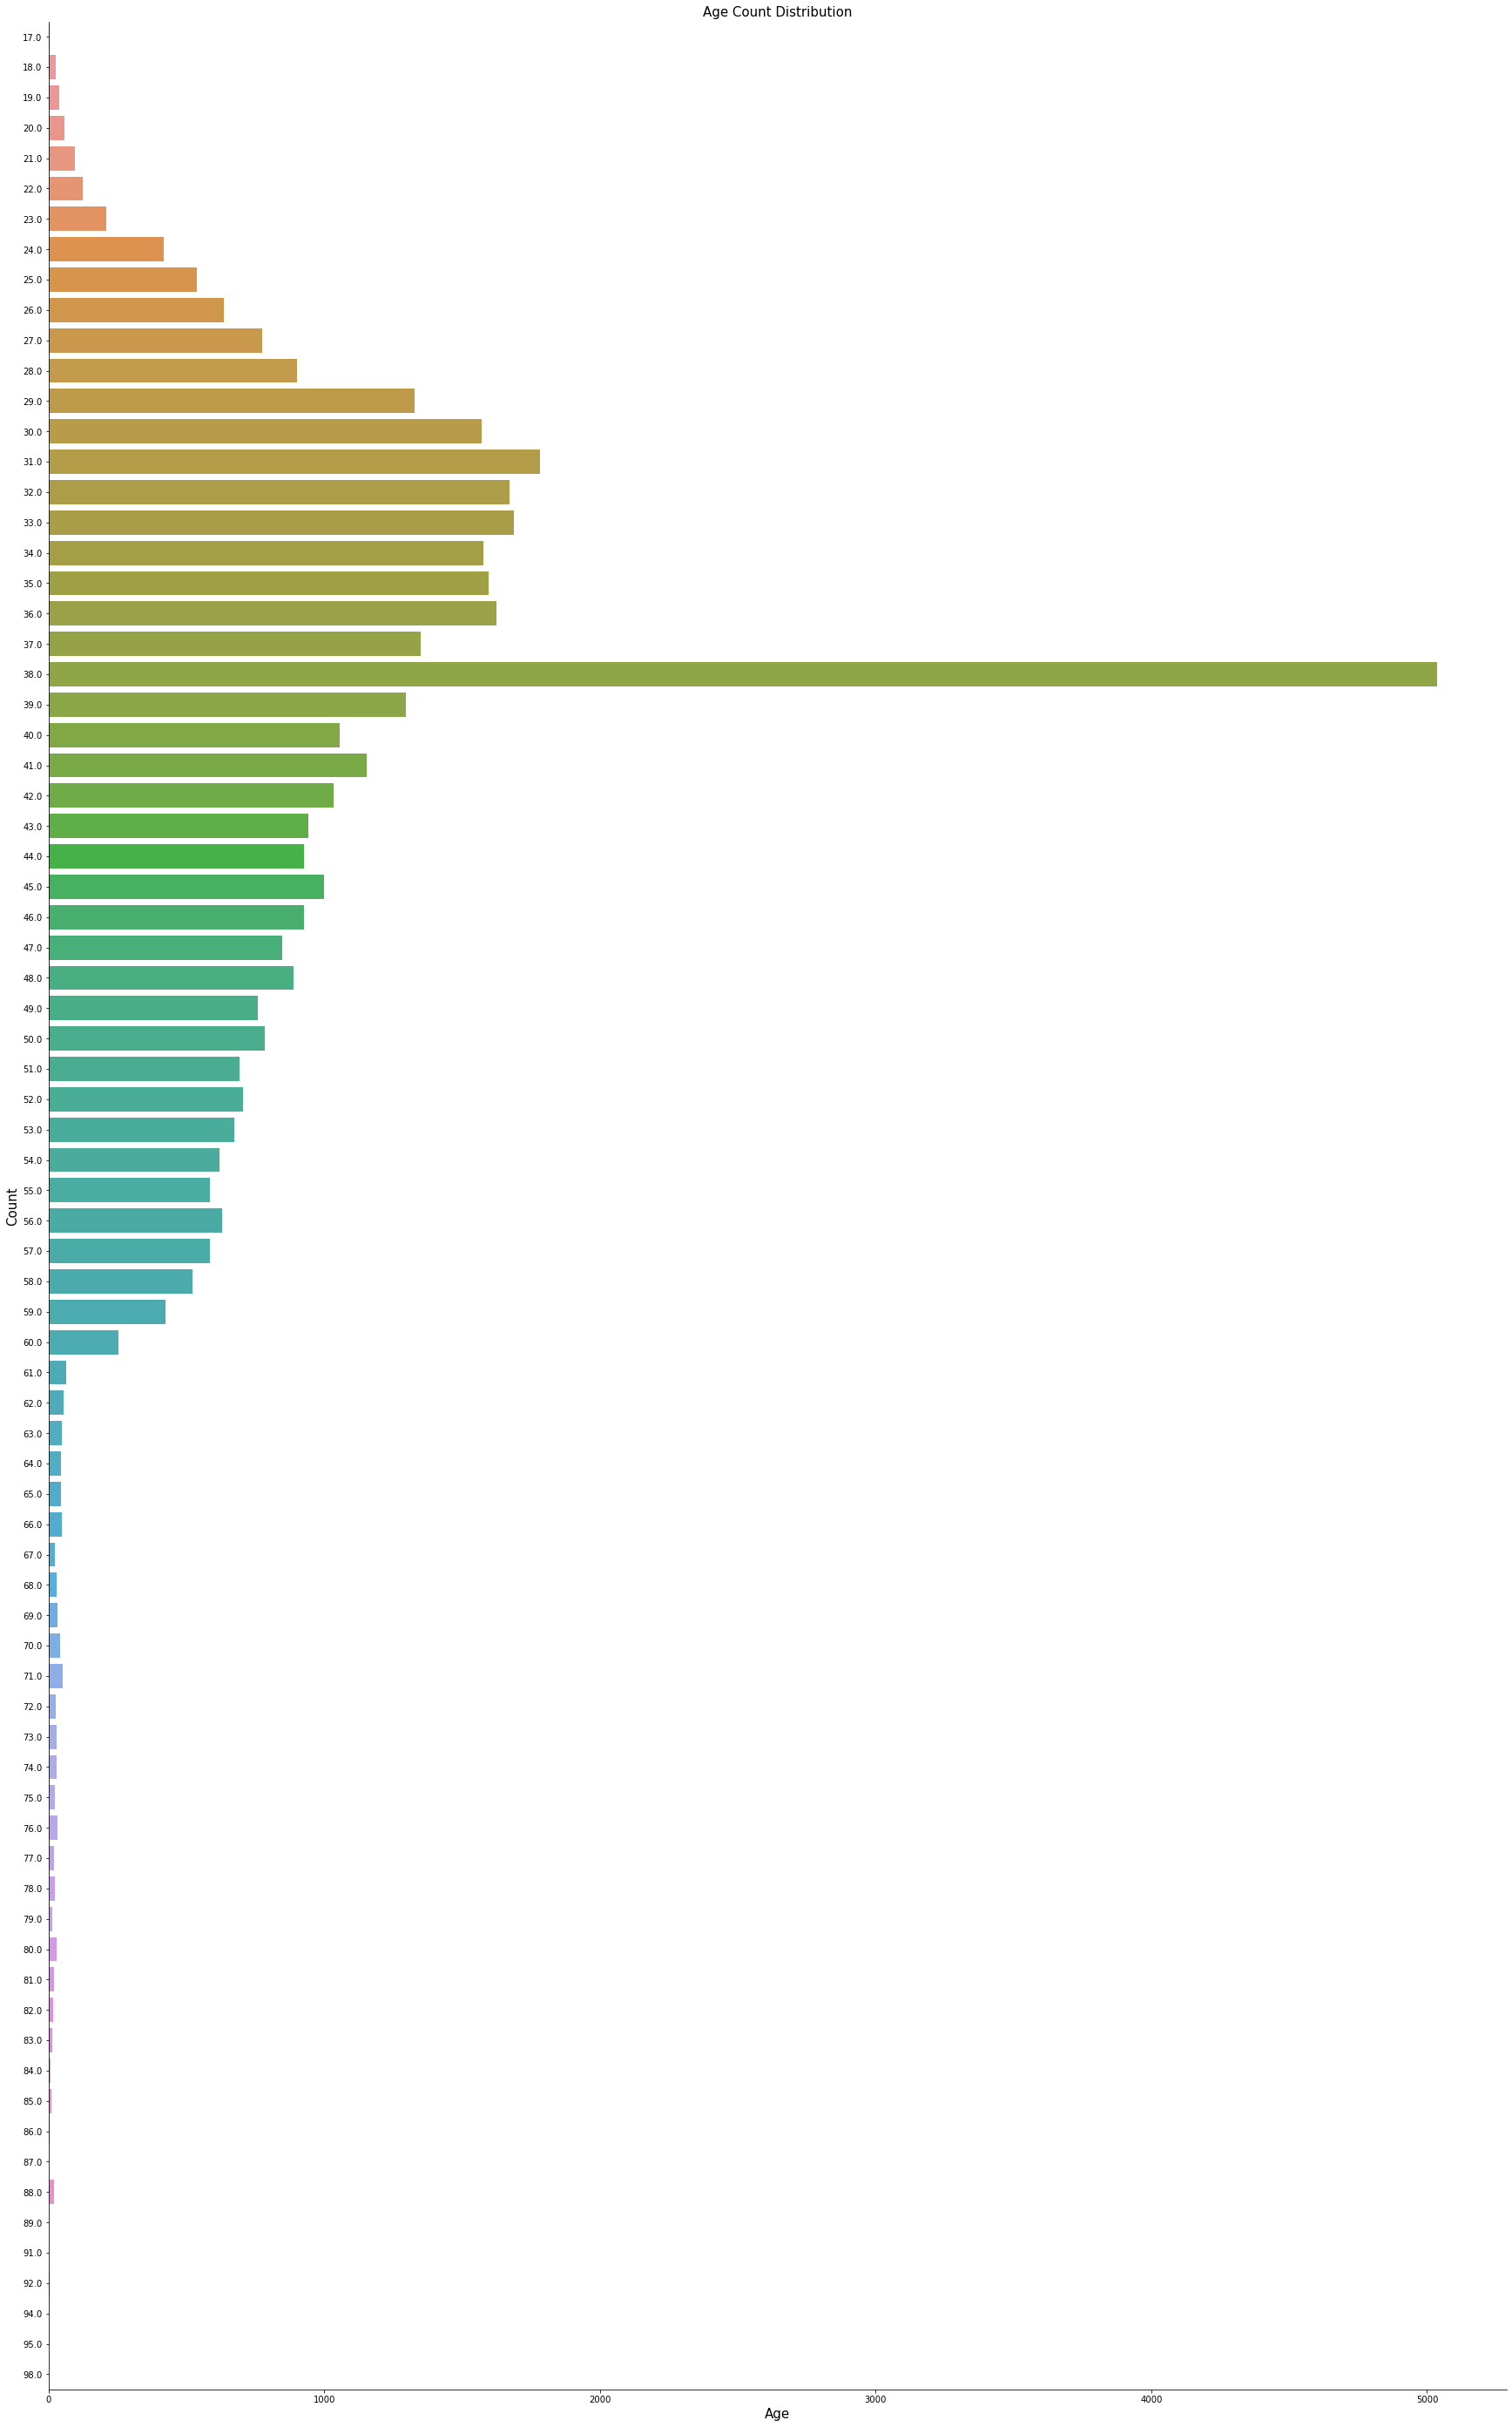

In [214]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 50)
sns.countplot(y = 'age', data = CS)
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Age Count Distribution', fontsize = 15)
sns.despine()

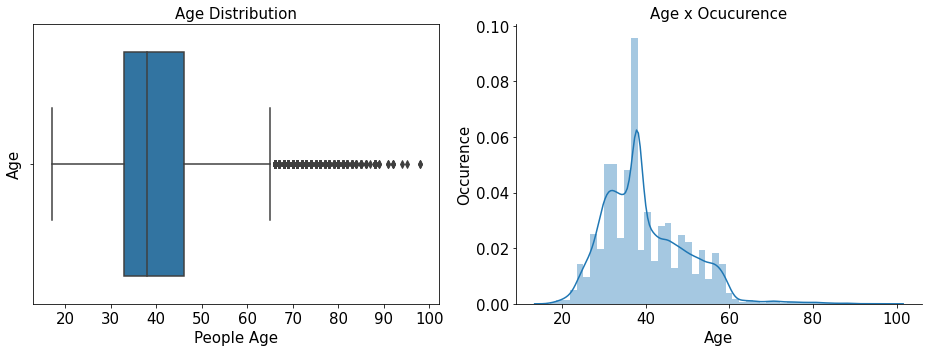

In [215]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = CS, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize = 15)
ax1.set_ylabel('Age', fontsize = 15)
ax1.set_title('Age Distribution', fontsize = 15)
ax1.tick_params(labelsize = 15)

sns.distplot(CS['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize = 15)
ax2.set_ylabel('Occurence', fontsize = 15)
ax2.set_title('Age x Ocucurence', fontsize = 15)
ax2.tick_params(labelsize = 15)

plt.subplots_adjust(wspace = 0.5)
plt.tight_layout() 

In [216]:
## Quartiles

print('1th Quartile: ', CS['age'].quantile(q = 0.25))
print('2and Quartile: ', CS['age'].quantile(q = 0.50))
print('3th Quartile: ', CS['age'].quantile(q = 0.75))
print('4th Quartile: ', CS['age'].quantile(q = 1.00))

# Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', CS['age'].quantile(q = 0.75) + 
                      1.5*(CS['age'].quantile(q = 0.75) - CS['age'].quantile(q = 0.25)), 'are outliers')

1th Quartile:  33.0
2and Quartile:  38.0
3th Quartile:  46.0
4th Quartile:  98.0
Ages above:  65.5 are outliers


In [217]:
print('Numerber of outliers: ', CS[CS['age'] > 65.5]['age'].count())
print('Number of clients: ', len(CS))

## Outliers in %
print('Outliers are:', round(CS[CS['age'] > 65.5]['age'].count()*100/len(CS),2), '%')

Numerber of outliers:  558
Number of clients:  41188
Outliers are: 1.35 %


In [218]:
## Calculating some values to evaluete this independent variable
print('Mean:', round(CS['age'].mean(), 2))

## A low standard deviation indicates that the data points tend to be close to the mean or expected value
## A high standard deviation indicates that the data points are scattered
print('Standar Deviation (STD) :', round(CS['age'].std(), 2))

## I think the best way to give a precisly insight about dispersion is using the CV (coefficient variation) (STD/MEAN)*100
###    cv < 15%, low dispersion
###    cv > 30%, high dispersion

print('CV (Coefficient Variation)  :',round(CS['age'].std()*100/CS['age'].mean(), 2), ', High middle dispersion')

Mean: 39.82
Standar Deviation (STD) : 9.95
CV (Coefficient Variation)  : 24.98 , High middle dispersion


From my perspective, based on the age visualization, the "age" is high dispersion and we cannot conclude that whether the age has a high effect to our target variable "Yes or No". In the high middle dispersion means that the people with all ages and might be all of them can subscribe the bank term deposit, or not. Lastly, There are outliers in the age column, so we can consider about whether needs to be include the model or not.

### Categorical Visualization

<AxesSubplot:title={'center':'Percentage of Target Variable'}, ylabel='target'>

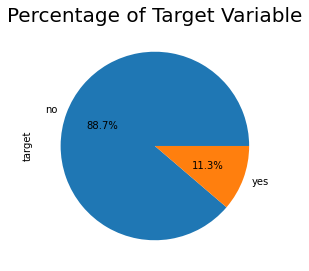

In [219]:
plt.figure(figsize = (20, 10))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Percentage of Target Variable", fontsize = 20)

CS["target"].value_counts().plot.pie(autopct = "%1.1f%%")

### Job

<AxesSubplot:title={'center':'Percentage of Job'}, ylabel='job'>

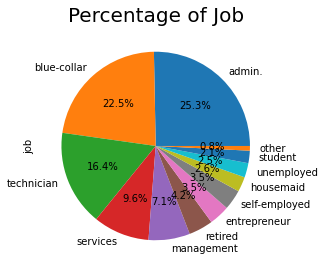

In [220]:
plt.figure(figsize = (20, 10))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Percentage of Job", fontsize = 20)

CS["job"].value_counts().plot.pie(autopct = "%1.1f%%")

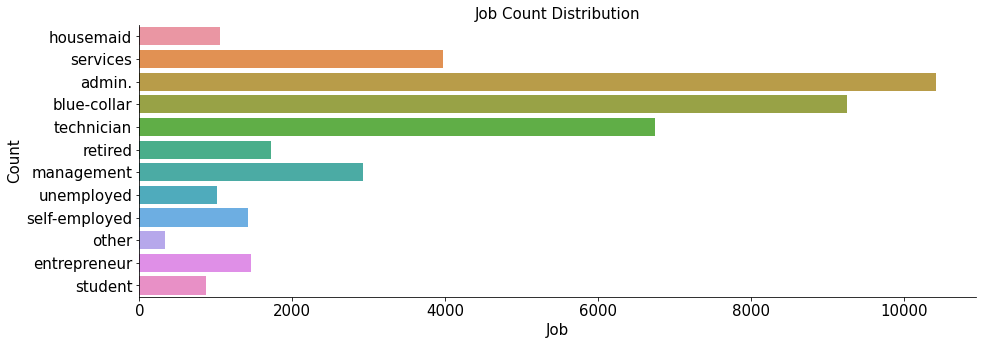

In [221]:
## What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(y = 'job', data = CS)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Based on the job visualization, we can see that the "Administration" job is the largest proportion in the job category, and the "Other" is the smallest proportion

### Marital

<AxesSubplot:title={'center':'Percentage of Marital'}, ylabel='marital'>

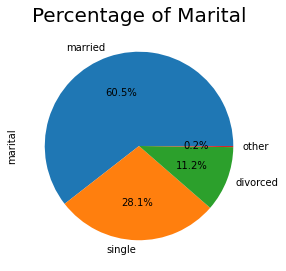

In [222]:
plt.figure(figsize = (20, 10))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Percentage of Marital", fontsize = 20)

CS["marital"].value_counts().plot.pie(autopct = "%1.1f%%")

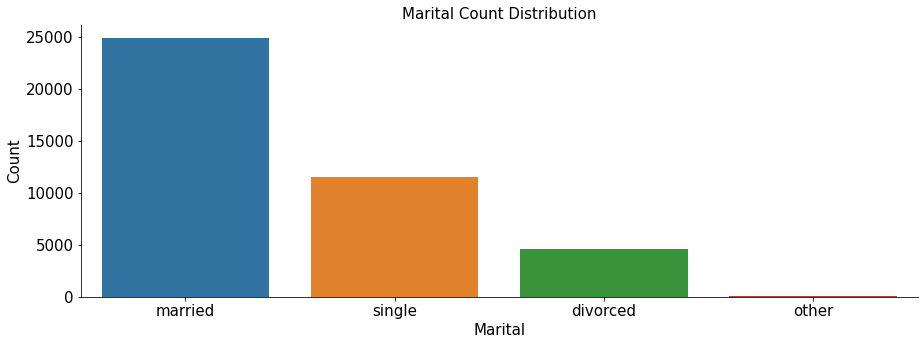

In [223]:
### What kind of 'marital clients' this bank have, 
### if you cross marital with default, loan or housing, there is no relation

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'marital', data = CS)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Based on the Marital visualization, we can see that "married" is the largest porprotion in Marital category, and the "other" is the smallest proportion

### Education

<AxesSubplot:title={'center':'Percentage of Education'}, ylabel='education'>

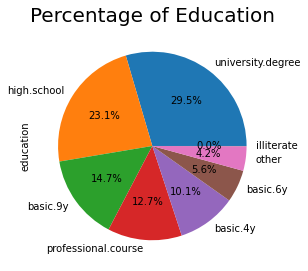

In [224]:
plt.figure(figsize = (20, 10))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Percentage of Education", fontsize = 20)

CS["education"].value_counts().plot.pie(autopct = "%1.1f%%")

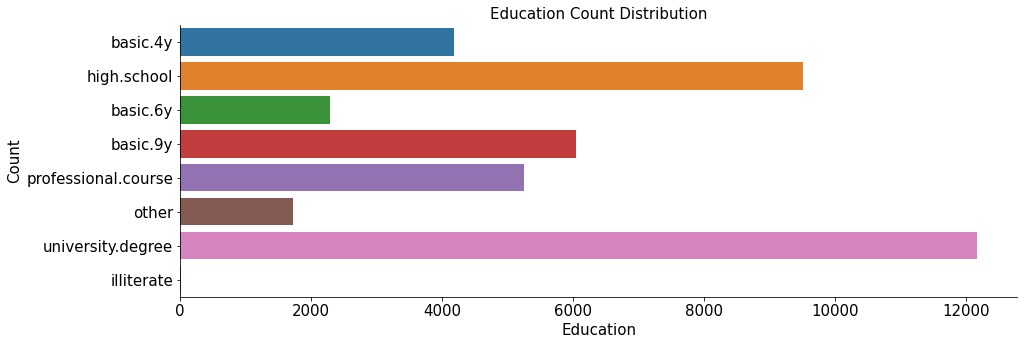

In [225]:
### What kind of 'education clients this bank have, 
### if you cross education with default, loan or housing, there is no relation

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(y = 'education', data = CS)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Based on the Education visualization, we can see that the "University.degree" is the largest proportion, and the "illiterate" is the smallest proportion in Education category

### In conclusion, from my perspective, the age does not mean too much whether has any relationship with these variables (Job, Education, Marital). Thus, these variables only can see each of the number counts

### Default, Housing, Loan

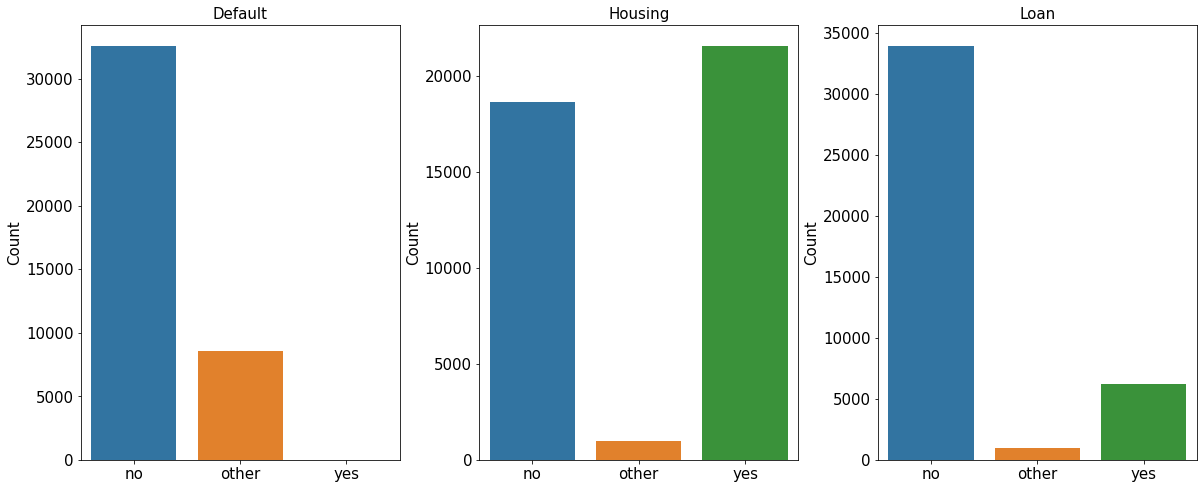

In [226]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = CS, ax = ax1, order = ['no', 'other', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = CS, ax = ax2, order = ['no', 'other', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = CS, ax = ax3, order = ['no', 'other', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

### Default

<AxesSubplot:title={'center':'Percentage of Default'}, ylabel='default'>

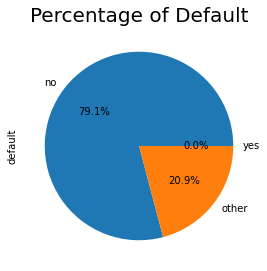

In [227]:
plt.figure(figsize = (20, 10))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Percentage of Default", fontsize = 20)

CS["default"].value_counts().plot.pie(autopct = "%1.1f%%")

In [228]:
print('Default:\n No credit in default:'     , CS[CS['default'] == 'no']['age'].count(),
              '\n Other credit in default:', CS[CS['default'] == 'other']['age'].count(),
              '\n Yes to credit in default:' , CS[CS['default'] == 'yes']['age'].count())

Default:
 No credit in default: 32588 
 Other credit in default: 8597 
 Yes to credit in default: 3


### Loan

<AxesSubplot:title={'center':'Percentage of Loan'}, ylabel='loan'>

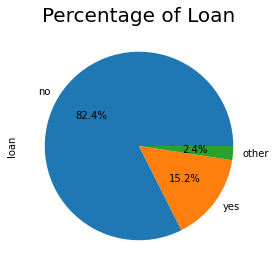

In [229]:
plt.figure(figsize = (20, 10))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Percentage of Loan", fontsize = 20)

CS["loan"].value_counts().plot.pie(autopct = "%1.1f%%")

In [230]:
print('Default:\n No credit in default:'     , CS[CS['loan'] == 'no']['age'].count(),
              '\n other credit in default:', CS[CS['loan'] == 'other']['age'].count(),
              '\n Yes to credit in default:' , CS[CS['loan'] == 'yes']['age'].count())

Default:
 No credit in default: 33950 
 other credit in default: 990 
 Yes to credit in default: 6248


### Housing

<AxesSubplot:title={'center':'Percentage of Housing'}, ylabel='housing'>

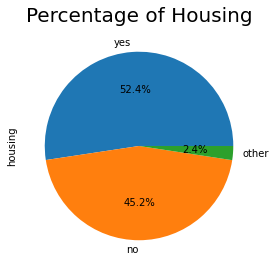

In [231]:
plt.figure(figsize = (20, 10))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Percentage of Housing", fontsize = 20)

CS["housing"].value_counts().plot.pie(autopct = "%1.1f%%")

In [232]:
print('Default:\n No credit in housing:'     , CS[CS['housing'] == 'no']['age'].count(),
              '\n Other credit in housing:', CS[CS['housing'] == 'other']['age'].count(),
              '\n Yes to credit in housing:' , CS[CS['housing'] == 'yes']['age'].count())

Default:
 No credit in housing: 18622 
 Other credit in housing: 990 
 Yes to credit in housing: 21576


### Based on "Loan", "Housing", "Default", they are just to see the distribution of the people (Yes, No and Other)

### Contact, Month, Day of Week, Poutcome

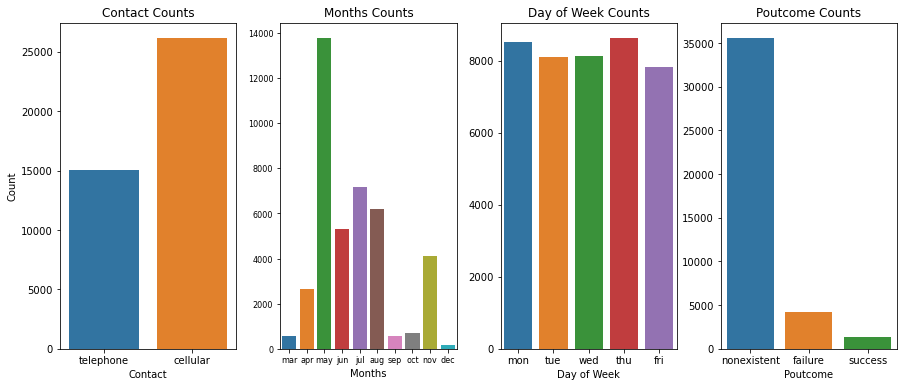

In [233]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (15,6))
sns.countplot(CS['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize = 10)

sns.countplot(CS['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize = 8)

sns.countplot(CS['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize = 10)


sns.countplot(CS['poutcome'], ax = ax4)
ax4.set_xlabel('Poutcome', fontsize = 10)
ax4.set_ylabel('')
ax4.set_title('Poutcome Counts')
ax4.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

1. Based on the "Contact" visualization, we can see that the "Cellular" proportion is larger than "telephone"
2. Based on the "Months" visualization, we can see that the "May" is the largest proportion and the "December" is the smallest proportion
3. Based on the "Day of Week", each of the days does not have an obvious gap between them, "Thursday" is the largest proportion.
4. Based on the "Poutcome", the "nonexistent" is the largest proportion and the "success" is the smallest proportion

In [234]:
print('Ages above: ', CS['duration'].quantile(q = 0.75) + 
                      1.5*(CS['duration'].quantile(q = 0.75) - CS['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  10.75 are outliers


In [235]:
CS[CS['duration'] > 10].count()

age               3464
job               3464
marital           3464
education         3464
default           3464
housing           3464
loan              3464
contact           3464
month             3464
day_of_week       3464
duration          3464
campaign          3464
pdays             3464
previous          3464
poutcome          3464
emp.var.rate      3464
cons.price.idx    3464
cons.conf.idx     3464
euribor3m         3464
nr.employed       3464
target            3464
target_binary     3464
dtype: int64

### Contact

<AxesSubplot:title={'center':'Percentage of Contact'}, ylabel='contact'>

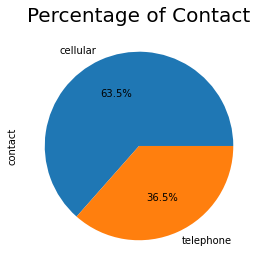

In [236]:
plt.figure(figsize = (20, 10))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Percentage of Contact", fontsize = 20)

CS["contact"].value_counts().plot.pie(autopct = "%1.1f%%")

<AxesSubplot:title={'center':'Percentage of Month'}, ylabel='month'>

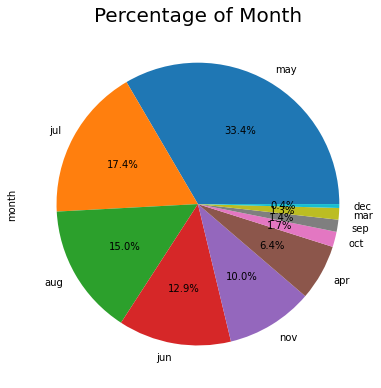

In [237]:
plt.figure(figsize = (30, 15))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Percentage of Month", fontsize = 20)

CS["month"].value_counts().plot.pie(autopct = "%1.1f%%")

<AxesSubplot:title={'center':'Percentage of Day of Week'}, ylabel='day_of_week'>

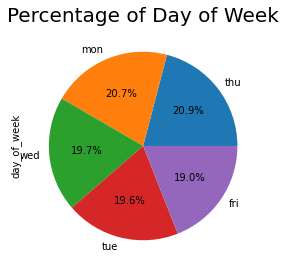

In [238]:
plt.figure(figsize = (20, 10))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Percentage of Day of Week", fontsize = 20)

CS["day_of_week"].value_counts().plot.pie(autopct = "%1.1f%%")

<AxesSubplot:title={'center':'Percentage of Poutcome'}, ylabel='poutcome'>

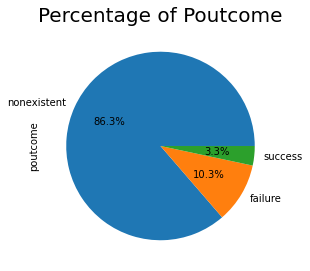

In [239]:
plt.figure(figsize = (20, 10))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Percentage of Poutcome", fontsize = 20)

CS["poutcome"].value_counts().plot.pie(autopct = "%1.1f%%")

## Duration Visualization

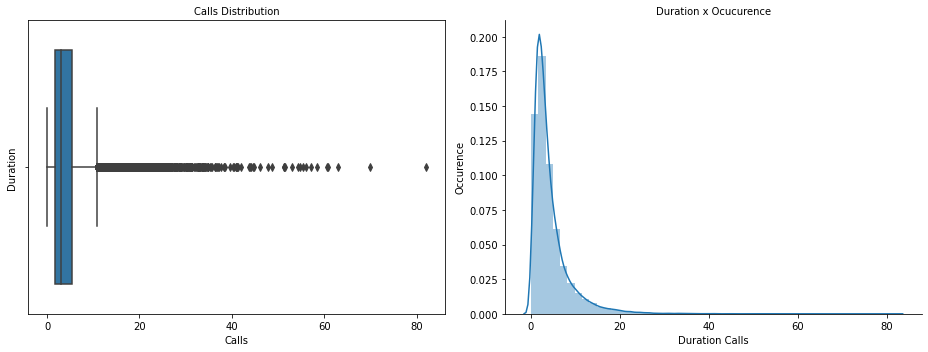

In [240]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = CS, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize = 10)
ax1.set_ylabel('Duration', fontsize = 10)
ax1.set_title('Calls Distribution', fontsize = 10)
ax1.tick_params(labelsize=10)

sns.distplot(CS['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize = 10)
ax2.set_ylabel('Occurence', fontsize = 10)
ax2.set_title('Duration x Ocucurence', fontsize = 10)
ax2.tick_params(labelsize = 10)

plt.subplots_adjust(wspace = 0.5)
plt.tight_layout() 

In [241]:
print("Max duration call in minutes:  ", round(CS['duration'].max(),2))
print("Min duration call in minutes:   ", round(CS['duration'].min(),2))
print("Mean duration call in minutes:   ", round(CS['duration'].mean(),2))
print("Standard Deivation duration call in minutes:   ", round(CS['duration'].std(),2))
      
## Std close to the mean means that the data values are close to the mean 

Max duration call in minutes:   81.97
Min duration call in minutes:    0.0
Mean duration call in minutes:    4.3
Standard Deivation duration call in minutes:    4.32


In [242]:
# Quartiles

print('1th Quartile: ', CS['duration'].quantile(q = 0.25))
print('2and Quartile: ', CS['duration'].quantile(q = 0.50))
print('3th Quartile: ', CS['duration'].quantile(q = 0.75))
print('4th Quartile: ', CS['duration'].quantile(q = 1.00))

## Calculate the outliers:
  ### Interquartile range, IQR = Q3 - Q1
  ### lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  ### Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', CS['duration'].quantile(q = 0.75) + 
                      1.5*(CS['duration'].quantile(q = 0.75) - CS['duration'].quantile(q = 0.25)), 'are outliers')

1th Quartile:  1.7
2and Quartile:  3.0
3th Quartile:  5.32
4th Quartile:  81.97
Duration calls above:  10.75 are outliers


In [243]:
print('Numerber of outliers: ', CS[CS['duration'] > 10.75]['duration'].count())
print('Number of clients: ', len(CS))

### Outliers in %
print('Outliers are:', round(CS[CS['duration'] > 10.72]['duration'].count()*100/len(CS),2), '%')

Numerber of outliers:  2955
Number of clients:  41188
Outliers are: 7.22 %


In [244]:
## If the call duration is equal to 0, then is obviously that this person didn't subscribed, 
### This lines need to be deleted later

CS[(CS['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,target_binary
6251,38.0,admin.,married,high.school,no,yes,no,telephone,may,tue,...,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no,0
23031,59.0,management,married,university.degree,no,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.575575,-36.1,4.965,5228.1,no,0
28063,38.0,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,999,0,nonexistent,-1.8,93.075000,-47.1,1.479,5099.1,no,0
33015,31.0,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,999,0,nonexistent,-1.8,92.893000,-46.2,1.299,5099.1,no,0


### Visualize the distribution of 'duration' & 'campaign'

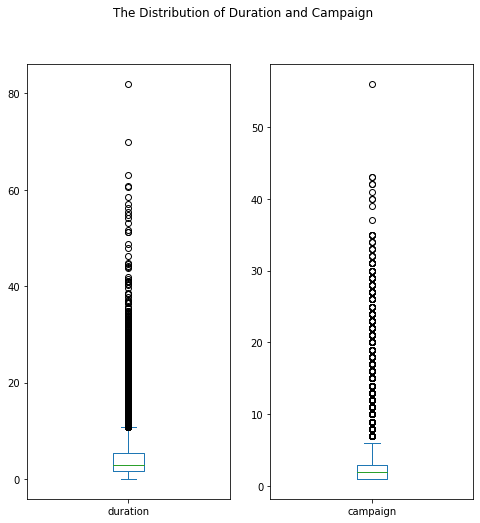

In [245]:
dist_cam = CS[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

1. Based on the distribution of duration (Box-plot), we can see that there has a median of around 3-4 mins (Contact time) and the left-skewed boxplot means that the most contact times are relatively short. And there are a lot of outliers which are between 10 - 83 mins
2. Based on the distribution of the campaign (Box-plot), we can see that half of the clients have been contacted by the bank for the second time, whereas about 25% of clients were first time to the term deposit. Moreover, most of the clients are already been reached by the bank one to three times, which makes sense. But, some of the clients have been reached by around 55 times, which was not normal. In others, the clients who are reached by a lot of times maybe some special requirement needs 

### Visualize the relationship between 'duration' & 'campaign': with target result

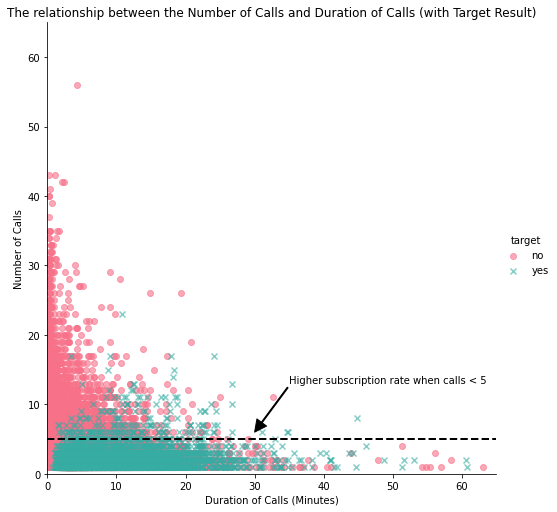

In [246]:
dur_cam = sns.lmplot(x='duration', y='campaign', hue = 'target', 
                     palette = "husl",
                     data = CS, 
                     markers = ["o", "x"],
                     fit_reg = False,
                     scatter_kws = {'alpha':0.6}, height =7)

plt.axis([0, 65, 0, 65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The relationship between the Number of Calls and Duration of Calls (with Target Result)')

# Annotation

plt.axhline(y = 5, linewidth = 2, color = "k", linestyle = '--')
plt.annotate('Higher subscription rate when calls < 5',xytext = (35,13),
             arrowprops = dict(color = 'k', width = 1), xy = (30,6))
plt.show()

1. Based on the scatter plot, the clients who are subscribed to term deposits are denoted as "yes, x" while those who are not subscribed to term deposits are denoted as "no, o"
2. Compared to the clients with "no" and "yes" were contacted by fewer times and had longer call duration
3. Lastly, after the five campaign calls, then the clients are more likely to reject the term deposit unless the duration calls are high. And Most of the "yes" clients were closed to less than 10 times
4. In conclusion, it suggests that the bank should prevent calling a client more than 5 times, which means it can be disturbing and rise dissatisfaction

### Data Visualization: The subscription rate by job

In [247]:
count_job_target_pct = pd.crosstab(CS['target'],CS['job']).apply(lambda x: x/x.sum() * 100)
count_job_target_pct = count_job_target_pct.transpose()

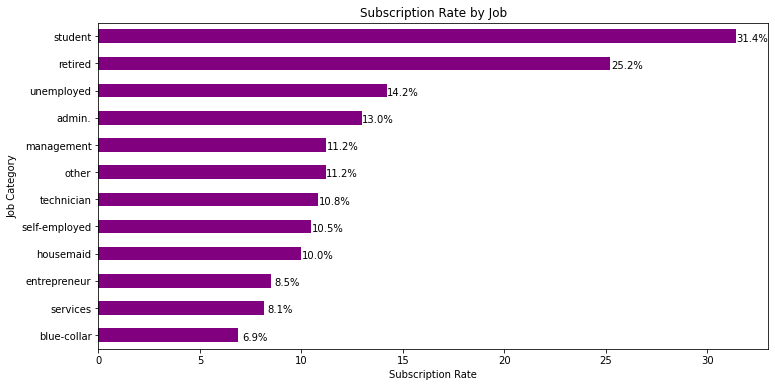

In [248]:
plot_job = count_job_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           color = {"purple"},
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width() + 0.8, 
                  rec.get_y() + rec.get_height() - 0.5, 
                  label +'%', 
                  ha = 'center', 
                  va = 'bottom')

Based on the horizontal bar chart, the "student" and "retired" are higher subscription rate to compare other job categories

### Data Visualization: The subscription rate by Month

In [249]:
count_month_target_pct = pd.crosstab(CS['target'],CS['month']).apply(lambda x: x/x.sum() * 100)
count_month_target_pct = count_month_target_pct.transpose()

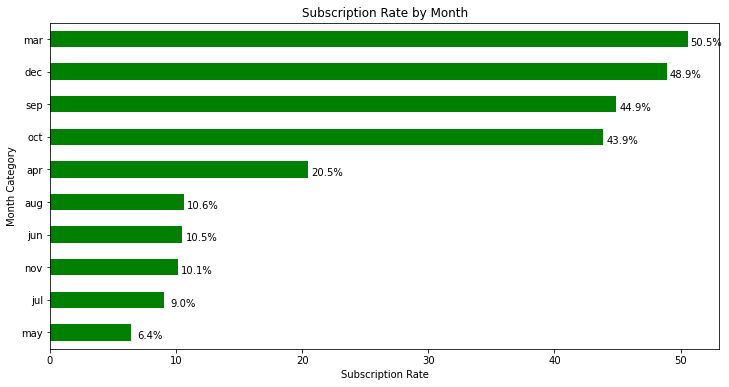

In [250]:
plot_month = count_month_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh', 
                                                                           color = {"green"},
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Month')
plt.xlabel('Subscription Rate')
plt.ylabel('Month Category')

# Label each bar

for rec, label in zip(plot_month.patches,
                      count_month_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_month.text(rec.get_width() + 1.5, 
                  rec.get_y() + rec.get_height() - 0.5, 
                  label+'%', 
                  ha = 'center', 
                  va ='bottom')

Based on the horizontal bar chart, the "Mar" is the  highest subscription rate to compare other month categories

## Encoding to Categorical Variables

### Jobs, Marital, Education, Default, Housing, Loan.

In [251]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

CS['job'] = labelencoder_X.fit_transform(CS['job']) 
CS['marital']  = labelencoder_X.fit_transform(CS['marital']) 
CS['education'] = labelencoder_X.fit_transform(CS['education']) 
CS['default'] = labelencoder_X.fit_transform(CS['default']) 
CS['housing'] = labelencoder_X.fit_transform(CS['housing']) 
CS['loan'] = labelencoder_X.fit_transform(CS['loan']) 

In [252]:
### Based on the previous Quartile to divide the age group

def age(dataframe):
    dataframe.loc[dataframe['age'] <= 33, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 33) & (dataframe['age'] <= 46), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 46) & (dataframe['age'] <= 65), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 65) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(CS);


In [253]:
CS.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,target_binary
0,3.0,3,1,0,0,0,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no,0
1,3.0,8,1,3,1,0,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no,0
2,2.0,8,1,3,0,2,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no,0
3,2.0,0,1,1,0,0,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no,0
4,3.0,8,1,3,0,0,2,telephone,may,mon,...,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no,0


In [254]:
print(CS.shape)
CS.head()

(41188, 22)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,target_binary
0,3.0,3,1,0,0,0,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no,0
1,3.0,8,1,3,1,0,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no,0
2,2.0,8,1,3,0,2,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no,0
3,2.0,0,1,1,0,0,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no,0
4,3.0,8,1,3,0,0,2,telephone,may,mon,...,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no,0


### Contact, Month, Day of Week

In [255]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
CS['contact']     = labelencoder_X.fit_transform(CS['contact']) 
CS['month']       = labelencoder_X.fit_transform(CS['month']) 
CS['day_of_week'] = labelencoder_X.fit_transform(CS['day_of_week']) 

In [256]:
CS.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,target_binary
0,3.0,3,1,0,0,0,0,1,6,1,...,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no,0
1,3.0,8,1,3,1,0,0,1,6,1,...,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no,0
2,2.0,8,1,3,0,2,0,1,6,1,...,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no,0
3,2.0,0,1,1,0,0,0,1,6,1,...,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no,0
4,3.0,8,1,3,0,0,2,1,6,1,...,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no,0


In [257]:
CS['duration']

0        4.35
1        2.48
2        3.77
3        2.52
4        5.12
         ... 
41183    5.57
41184    6.38
41185    3.15
41186    7.37
41187    3.98
Name: duration, Length: 41188, dtype: float64

In [258]:
### Based on the previous Quartile to divide the duration group

def duration(data):

    data.loc[data['duration'] <= 1.72, 'duration'] = 1
    data.loc[(data['duration'] > 1.72) & (data['duration'] <= 3.0)  , 'duration'] = 2
    data.loc[(data['duration'] > 3.0) & (data['duration'] <= 5.32)  , 'duration'] = 3
    data.loc[(data['duration'] > 5.32) & (data['duration'] <= 10.72), 'duration'] = 4
    data.loc[data['duration']  > 10.72, 'duration'] = 5

    return data
duration(CS);

In [259]:
CS.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,target_binary
0,3.0,3,1,0,0,0,0,1,6,1,...,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no,0
1,3.0,8,1,3,1,0,0,1,6,1,...,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no,0
2,2.0,8,1,3,0,2,0,1,6,1,...,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no,0
3,2.0,0,1,1,0,0,0,1,6,1,...,999,0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no,0
4,3.0,8,1,3,0,0,2,1,6,1,...,999,0,nonexistent,1.1,93.575575,-36.4,4.857,5191.0,no,0


### Other Attributes

In [260]:
## "Nonexistent" == 1, "failure" == 2, "success" == 3

CS['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

## Machine Learning Model

1. Based on the dataset, it is the labeled datset, so we need to use the supervised Machine learning model, such as "Classification" & "Regression"
2. Labeled: is our target variable ("Yes" or "No")
3. Supervised Machine Learning Model: Logistic Regression, Naive Bayes Classifiers, Rondom Forest Classifiers, K-NN (k nearest neighbors), Decision Trees, Support Vector Machine, XGBoost, Gradient boosting.

In [261]:
CS_final = CS[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]

CS_final.shape

(41188, 20)

### Variance Inflation Factor (VIF)

In [262]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = CS_final
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

          features    vif_Factor
0              age      9.559185
1              job      2.083656
2          marital      3.644906
3        education      4.117067
4          default      1.407826
5          housing      2.205650
6             loan      1.207887
7          contact      2.732453
8            month      6.717013
9      day_of_week      3.086691
10        duration      5.420156
11    emp.var.rate     37.892845
12  cons.price.idx  35518.889104
13   cons.conf.idx    130.949008
14       euribor3m    315.390010
15     nr.employed  42083.040566
16        campaign      1.943440
17           pdays     70.557921
18        previous      5.022920
19        poutcome     51.031420


Drop the variables which VIF is larger than 10:
1. emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, pdays, poutcome

In [263]:
X = CS_final.drop(["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", 
                  "pdays", "poutcome"], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       features  vif_Factor
0           age    5.864777
1           job    2.041095
2       marital    2.947333
3     education    3.585705
4       default    1.362589
5       housing    2.121191
6          loan    1.200624
7       contact    1.868832
8         month    4.369858
9   day_of_week    2.872211
10     duration    4.574823
11     campaign    1.817320
12     previous    1.225325


Overall, all the variables VIF are smaller than 10, which is great, then we can build the ML model now

In [264]:
CS_final_new = CS[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous']]

CS_final_new.shape

(41188, 13)

In [265]:
# Converting dependent variable categorical to dummy
target = pd.get_dummies(CS['target'], columns = ['target'], prefix = ['tar'], drop_first = True)

In [266]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CS_final_new, target, test_size = 0.2, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, mean_squared_error
k_fold = KFold(n_splits = 10, shuffle = True, random_state=0)

In [267]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous
39577,4.0,6,1,2,0,0,0,0,6,3,2.0,1,2
10104,3.0,10,1,7,0,2,0,1,4,2,4.0,1,0
17235,2.0,8,1,3,0,0,0,0,3,0,4.0,4,0
20926,1.0,0,3,7,0,2,0,0,1,2,4.0,1,0
17626,3.0,2,1,2,0,2,0,0,3,1,2.0,5,0


In [268]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Logistic Regression Model

In [269]:
from sklearn.linear_model import LogisticRegression

LOG_model = LogisticRegression() 
LOG_model.fit(X_train,y_train)
LOG_pred = LOG_model.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, LOG_pred))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, LOG_pred), 2)*100)
print("Precision: ", round(precision_score(y_test, LOG_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, LOG_pred), 2)*100)
LOG_CV = (cross_val_score(LOG_model, X_train, y_train, cv = k_fold, n_jobs=1, scoring = 'accuracy').mean())

Confusion Matrix: 
	
[[7110  169]
 [ 711  248]]
	
Accuracy:  89.0
Precision:  59.0
Recall:  26.0


### KNN Model

k=1 86.79 (+/- 0.56)
k=2 88.76 (+/- 0.70)
k=3 88.31 (+/- 0.51)
k=4 88.92 (+/- 0.63)
k=5 89.00 (+/- 0.60)
k=6 89.04 (+/- 0.73)
k=7 89.06 (+/- 0.61)
k=8 89.03 (+/- 0.71)
k=9 89.09 (+/- 0.60)
k=10 89.10 (+/- 0.71)
k=11 89.08 (+/- 0.65)
k=12 89.04 (+/- 0.71)
k=13 89.12 (+/- 0.70)
k=14 89.04 (+/- 0.72)
k=15 89.04 (+/- 0.74)
k=16 89.07 (+/- 0.71)
k=17 89.12 (+/- 0.70)
k=18 89.00 (+/- 0.70)
k=19 89.05 (+/- 0.73)
k=20 89.03 (+/- 0.71)
k=21 89.05 (+/- 0.71)
k=22 89.03 (+/- 0.73)
k=23 89.02 (+/- 0.71)
k=24 89.00 (+/- 0.72)
k=25 89.03 (+/- 0.71)
The optimal number of neighbors is 16 with 89.1%


Text(0, 0.5, 'Train Accuracy')

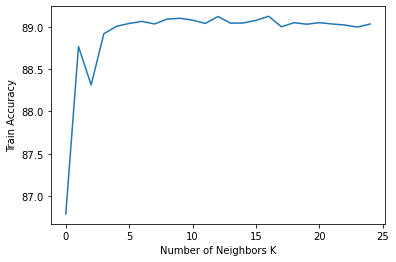

In [270]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(CS_final_new, target, test_size = 0.2)

# Neighbors
neighbors = np.arange(0,25)

# Create empty list that will hold cv scores
cv_scores = []

# Perform 10-fold cross validation on training set for odd values of k:

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights ='uniform', p=2, metric = 'euclidean')
    kfold = model_selection.KFold(n_splits = 10)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')

In [271]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 22)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, KNN_pred))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, KNN_pred),2)*100)
print("Precision: ", round(precision_score(y_test, KNN_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, KNN_pred), 2)*100)
KNN_CV = (cross_val_score(knn, X_train, y_train, cv = k_fold, n_jobs = 1, scoring = 'accuracy').mean())

Confusion Matrix: 
	
[[7231   48]
 [ 886   73]]
	
Accuracy:  89.0
Precision:  60.0
Recall:  8.0


### SVM Model

In [272]:
from sklearn.svm import SVC

SVM = SVC(kernel = 'sigmoid', probability = True)
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, SVM_pred))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, SVM_pred),2)*100)
print("Precision: ", round(precision_score(y_test, SVM_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, SVM_pred), 2)*100)
SVC_1 = (cross_val_score(SVM, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

Confusion Matrix: 
	
[[6672  607]
 [ 667  292]]
	
Accuracy:  85.0
Precision:  32.0
Recall:  30.0


### Decision Tree Classification Model

In [273]:
from sklearn.tree import DecisionTreeClassifier

DTREE= DecisionTreeClassifier(criterion='gini') 
DTREE.fit(X_train, y_train)
DTREE_pred = DTREE.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, DTREE_pred))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, DTREE_pred),2)*100)
print("Precision: ", round(precision_score(y_test, DTREE_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, DTREE_pred), 2)*100)
DTREE_CV = (cross_val_score(DTREE, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

Confusion Matrix: 
	
[[6713  566]
 [ 580  379]]
	
Accuracy:  86.0
Precision:  40.0
Recall:  40.0


### Random Forest Classification Model

In [274]:
from sklearn.ensemble import RandomForestClassifier

RFC_1 = RandomForestClassifier(n_estimators = 200)
RFC_1.fit(X_train, y_train)
RFC_1_pred = RFC_1.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, RFC_1_pred))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, RFC_1_pred),2)*100)
print("Precision: ", round(precision_score(y_test, RFC_1_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, RFC_1_pred), 2)*100)
RFC_CV = (cross_val_score(RFC_1, X_train, y_train, cv=k_fold, n_jobs = 1, scoring = 'accuracy', error_score='raise').mean())

Confusion Matrix: 
	
[[7016  263]
 [ 620  339]]
	
Accuracy:  89.0
Precision:  56.00000000000001
Recall:  35.0


### Gaussian Naive Bayes Model

In [275]:
from sklearn.naive_bayes import GaussianNB

GAUSS= GaussianNB()
GAUSS.fit(X_train, y_train)
GAUSS_pred = GAUSS.predict(X_test)
probs = GAUSS.predict(X_test)

print(confusion_matrix(y_test, GAUSS_pred))
print(round(accuracy_score(y_test, GAUSS_pred),2)*100)
GAUSIAN_CV = (cross_val_score(GAUSS, X_train, y_train, cv = k_fold, n_jobs = 1, scoring = 'accuracy').mean())

[[6763  516]
 [ 541  418]]
87.0


### XGB (Xgboost) Model

In [276]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, XGB_pred))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, XGB_pred),2)*100)
print("Precision: ", round(precision_score(y_test, XGB_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, XGB_pred), 2)*100)
XGB_1 = (cross_val_score(estimator = XGB, X = X_train, y = y_train, cv = 10).mean())

[17:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix: 
	
[[7001  278]
 [ 554  405]]
	
Accuracy:  90.0
Precision:  59.0
Recall:  42.0
[17:17:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to

### Gradient Boosting Classifier Model

In [277]:
from sklearn.ensemble import GradientBoostingClassifier

GBK = GradientBoostingClassifier()
GBK.fit(X_train, y_train)
GBK_pred = GBK.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, GBK_pred ))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, GBK_pred),2)*100)
print("Precision: ", round(precision_score(y_test, GBK_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, GBK_pred), 2)*100)
GBK_CV = (cross_val_score(GBK, X_train, y_train, cv=k_fold, n_jobs = 1, scoring = 'accuracy').mean())

Confusion Matrix: 
	
[[7051  228]
 [ 590  369]]
	
Accuracy:  90.0
Precision:  62.0
Recall:  38.0


### Display all Machine Learning model

In [278]:
Models = pd.DataFrame({
                'Models': ['Logistic Model', 'K-Nearest Neighbors', 'Support Vector Machine', 'Decision Tree Classifier', 
                           'Random Forest Classifier', 'Gaussian Naive Bayes', 'XGBoost', 'Gradient Boosting'],
                'Score':  [LOG_CV, KNN_CV, SVC_1, DTREE_CV, RFC_CV, GAUSIAN_CV, XGB_1, GBK_CV]})

Models.sort_values(by='Score', ascending=False)

,Models,Score
7,Gradient Boosting,0.904219
6,XGBoost,0.902124
4,Random Forest Classifier,0.897390
0,Logistic Model,0.896388
1,K-Nearest Neighbors,0.893657
5,Gaussian Naive Bayes,0.876783
3,Decision Tree Classifier,0.869985
2,Support Vector Machine,0.845341


### Display all the model learning curve

Logistic Regression

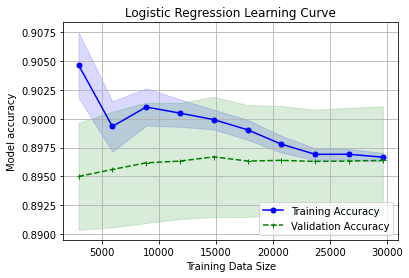

In [279]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = LOG_model, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Logistic Regression Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Support Vector Machine Classification

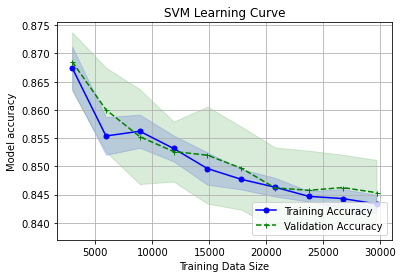

In [280]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = SVM, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('SVM Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Decision Tree Classification

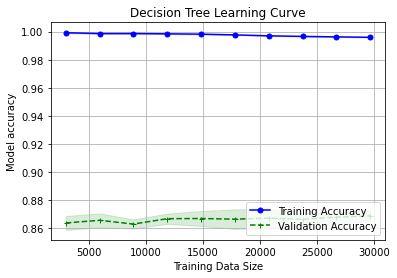

In [281]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = DTREE, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Decision Tree Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Random Forest Classification

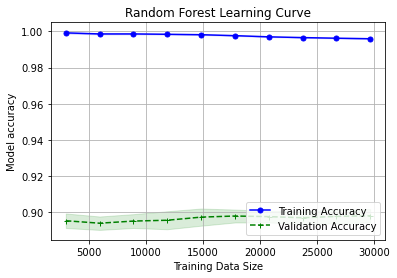

In [282]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = RFC_1, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color ='blue')
plt.plot(train_sizes, test_mean, color='green', marker = '+', markersize=5, linestyle='--', label ='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color= 'green')
plt.title('Random Forest Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

XGboost

[18:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:04:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:04:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:05:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

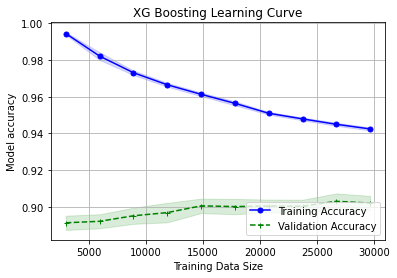

In [283]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = XGB, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)
#
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color ='blue')
plt.plot(train_sizes, test_mean, color='green', marker = '+', markersize=5, linestyle = '--', label ='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'green')
plt.title('XG Boosting Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

Gradient Boosting Classification

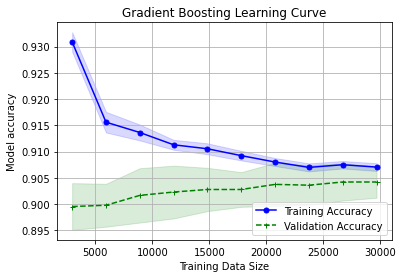

In [284]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = GBK, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)
#
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color ='blue')
plt.plot(train_sizes, test_mean, color='green', marker = '+', markersize=5, linestyle = '--', label ='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'green')
plt.title('Gradient Boosting Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

KNN

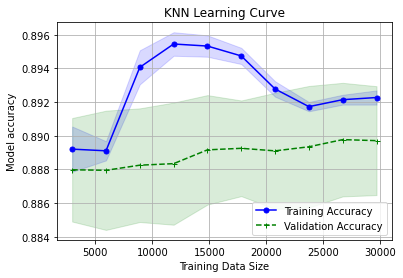

In [285]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = KNN, X = X_trainK, y = y_trainK,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)
#
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color ='blue')
plt.plot(train_sizes, test_mean, color='green', marker = '+', markersize = 5, linestyle = '--', label ='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'green')
plt.title('KNN Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

Gaussian Naive Bayes

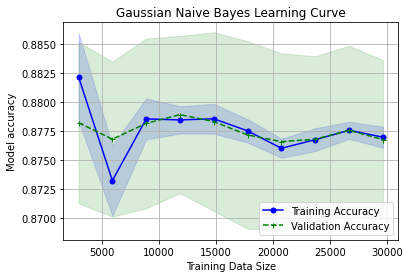

In [286]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = GAUSS, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)
#
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color ='blue')
plt.plot(train_sizes, test_mean, color='green', marker = '+', markersize = 5, linestyle = '--', label ='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'green')
plt.title('Gaussian Naive Bayes Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

Overall I think the SVM, Logistic, Gradient Boosting and Gaussian Naive Bayes Models are better because they are neither overfitting nor underfitting, which means their training and validation curves are normal. And other models are not, which means other models may have overfitting or underfitting.

### Precision Recall Curve

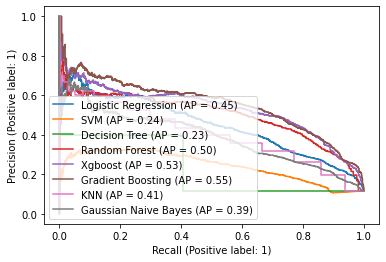

In [287]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(LOG_model, X_test, y_test, ax = plt.gca(), name = 'Logistic Regression')

plot_precision_recall_curve(SVM, X_test, y_test, ax = plt.gca(), name = 'SVM')

plot_precision_recall_curve(DTREE, X_test, y_test, ax = plt.gca(), name = 'Decision Tree')

plot_precision_recall_curve(RFC_1, X_test, y_test, ax = plt.gca(), name = 'Random Forest')

plot_precision_recall_curve(XGB, X_test, y_test, ax = plt.gca(), name = 'Xgboost')

plot_precision_recall_curve(GBK, X_test, y_test, ax = plt.gca(), name = 'Gradient Boosting')

plot_precision_recall_curve(KNN, X_test, y_test, ax = plt.gca(), name = 'KNN')

plot_precision_recall_curve(GAUSS, X_test, y_test, ax = plt.gca(), name = 'Gaussian Naive Bayes')

Compare SVM, Logistics, Gradient Boosting and Gaussian Naive Bayes Models (Precision Recall Curve):

1. Gradient boosting of AP score is better than others (AP = 0.55)
2. We can also use ROC & AUC and classification report to compare these models

## ROC & AUC

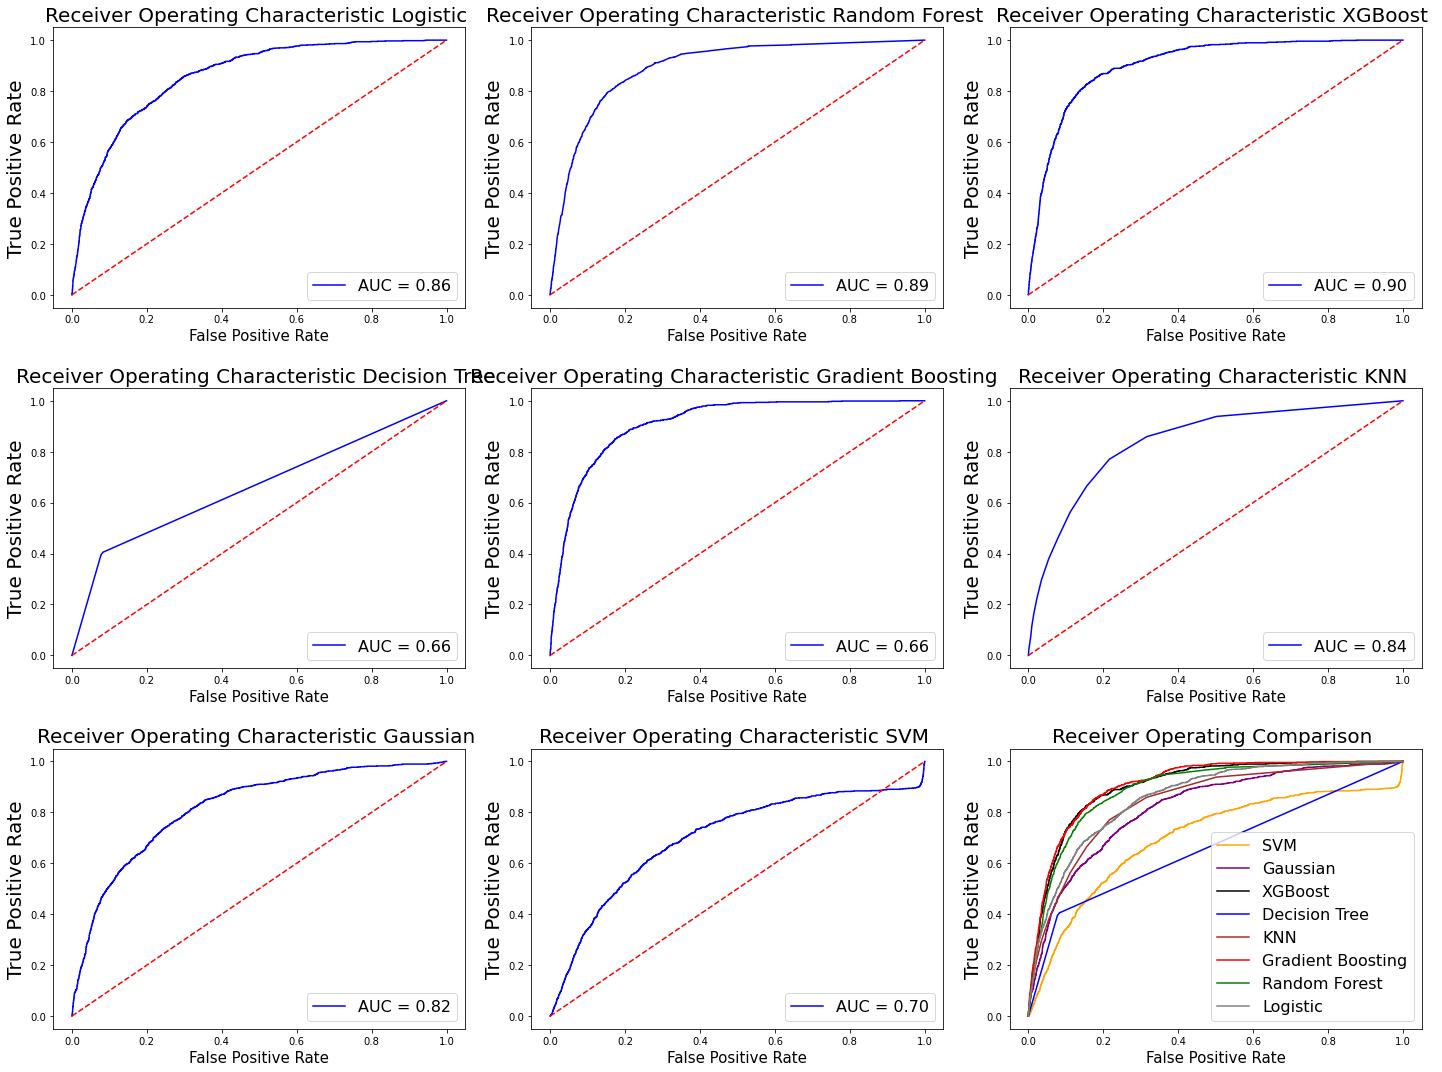

In [288]:
from sklearn import metrics

fig, ax_arr = plt.subplots(nrows = 3, ncols = 3, figsize = (20,15))

## Logistics Regression Model

probs = LOG_model.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize = 20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[0,0].legend(loc = 'lower right', prop = {'size': 16})

### Random Forest Model

probs = RFC_1.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize = 20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[0,1].legend(loc = 'lower right', prop = {'size': 16})

### XGBOOST

probs = XGB.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax_arr[0,2].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic XGBoost ',fontsize = 20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[0,2].legend(loc = 'lower right', prop = {'size': 16})


### Decision Tree Model

probs = DTREE.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize = 20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[1,0].legend(loc = 'lower right', prop = {'size': 16})

## Gradient Boosting

probs = GBK.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax_arr[1,1].plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gradient Boosting ',fontsize = 20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[1,1].legend(loc = 'lower right', prop = {'size': 16})


### KNN Model

probs = KNN.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[1,2].plot([0, 1], [0, 1],'r--')
ax_arr[1,2].set_title('Receiver Operating Characteristic KNN ',fontsize = 20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[1,2].legend(loc = 'lower right', prop = {'size': 16})


### Gaussian Model

probs = GAUSS.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[2,0].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[2,0].plot([0, 1], [0, 1],'r--')
ax_arr[2,0].set_title('Receiver Operating Characteristic Gaussian ',fontsize = 20)
ax_arr[2,0].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[2,0].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[2,0].legend(loc = 'lower right', prop = {'size': 16})


### SVM

probs = SVM.predict_proba(X_test)
preds = probs[:,1]
fprsvm, tprsvm, thresholdsvm = metrics.roc_curve(y_test, preds)
roc_aucsvm = metrics.auc(fprsvm, tprsvm)

ax_arr[2,1].plot(fprsvm, tprsvm, 'b', label = 'AUC = %0.2f' % roc_aucsvm)
ax_arr[2,1].plot([0, 1], [0, 1],'r--')
ax_arr[2,1].set_title('Receiver Operating Characteristic SVM ',fontsize = 20)
ax_arr[2,1].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[2,1].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[2,1].legend(loc = 'lower right', prop = {'size': 16})

# ### All plots

ax_arr[2,2].plot(fprsvm, tprsvm, 'b', label = 'SVM', color = 'orange')
ax_arr[2,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color = 'purple')
ax_arr[2,2].plot(fprxgb, tprxgb, 'b', label = 'XGBoost', color = 'black')
ax_arr[2,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color = 'blue')
ax_arr[2,2].plot(fprknn, tprknn, 'b', label = 'KNN', color = 'brown')
ax_arr[2,2].plot(fprgbk, tprgbk, 'b', label = 'Gradient Boosting', color = 'red')
ax_arr[2,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color = 'green')
ax_arr[2,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color = 'grey')
ax_arr[2,2].set_title('Receiver Operating Comparison ',fontsize = 20)
ax_arr[2,2].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[2,2].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[2,2].legend(loc = 'lower right', prop = {'size': 16})

plt.subplots_adjust(wspace = 2, hspace = 1)
plt.tight_layout() 

Compare SVM, Logistics, Gradient Boosting and Gaussian Naive Bayes Models (ROC & AUC):

1. The accuracy is measured by the area under the ROC curve.
2. The area of 1 indicates that a perfect test, the area of 0.5 represents a worthless test
3. Based o the each model AUC, we can see that the "Logistic Regression" has the highest score (86%) compare to others.
4. Gaussian Navie Bayes Model of AUC is 82%, which is good, but the "Logistic Regression" is better.

## Confusion Matrix Report

In [289]:
from sklearn.metrics import classification_report

### Logistic Regression Report

In [290]:
print('Logistic Regression Confusion Matrix\n', confusion_matrix(y_test, LOG_pred))

Logistic Regression Confusion Matrix
 [[7110  169]
 [ 711  248]]


In [291]:
print('Logistic Regression Reports\n',classification_report(y_test, LOG_pred))

Logistic Regression Reports
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7279
           1       0.59      0.26      0.36       959

    accuracy                           0.89      8238
   macro avg       0.75      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238



### Gaussian Navie Bayes Report

In [299]:
print('Gaussian Navie Bayes Confusion Matrix\n', confusion_matrix(y_test, GAUSS_pred))

Gaussian Navie Confusion Matrix
 [[6763  516]
 [ 541  418]]


In [300]:
print('Gaussian Navie Bayes Reports\n',classification_report(y_test, GAUSS_pred))

Gaussian Navie Bayes Reports
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7279
           1       0.45      0.44      0.44       959

    accuracy                           0.87      8238
   macro avg       0.69      0.68      0.68      8238
weighted avg       0.87      0.87      0.87      8238



Compare Logistic Regression & Gaussian Navie Bayes

1. We need high recall because it is more important than getting a high precision, which means we would like to detect as many clients subscribed as possible. Thus, the Gaussian Navie Bayes has highest recall. 

### Gaussian Navie Bayes Model to predict our target variable "Y", which has the client subscribed a term deposit ("Yes or No")

In [301]:
test_target_1 = pd.Series(GAUSS.predict(X_test), name = "Target Variable")

results_1 = pd.DataFrame(test_target_1)

In [302]:
results_1.shape

(8238, 1)

In [303]:
print(results_1)

      Target Variable
0                   0
1                   0
2                   0
3                   0
4                   0
...               ...
8233                0
8234                0
8235                0
8236                0
8237                0

[8238 rows x 1 columns]


In [304]:
results_1.value_counts()

Target Variable
0                  7304
1                   934
dtype: int64